# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

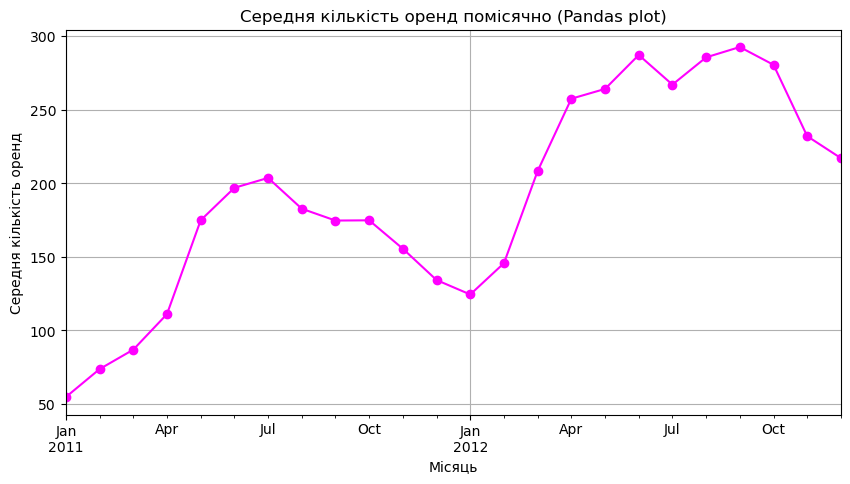

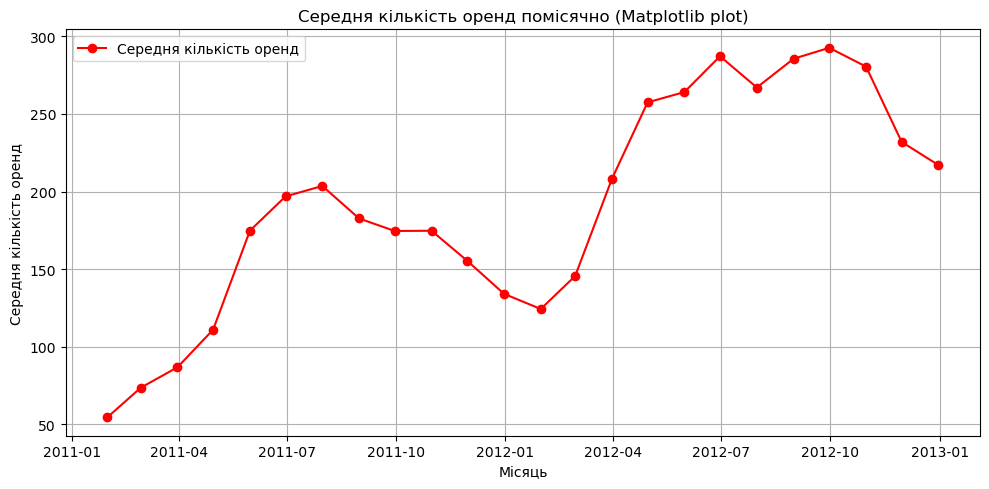

In [12]:
monthly_avg = df['count'].resample('ME').mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(
    marker='o',
    color='magenta',
    title='Середня кількість оренд помісячно (Pandas plot)',
    grid=True
)
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='red',
    label='Середня кількість оренд'
)
plt.title('Середня кількість оренд помісячно (Matplotlib plot)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Відповіді
Ці два графіки дуже схожі. Візуально мені більше подобається версія Matplotlib. У нього приємніша візуально сітка, шкала поділу. Але код Pandas простіший, тож його використовувати легше. 

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [13]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

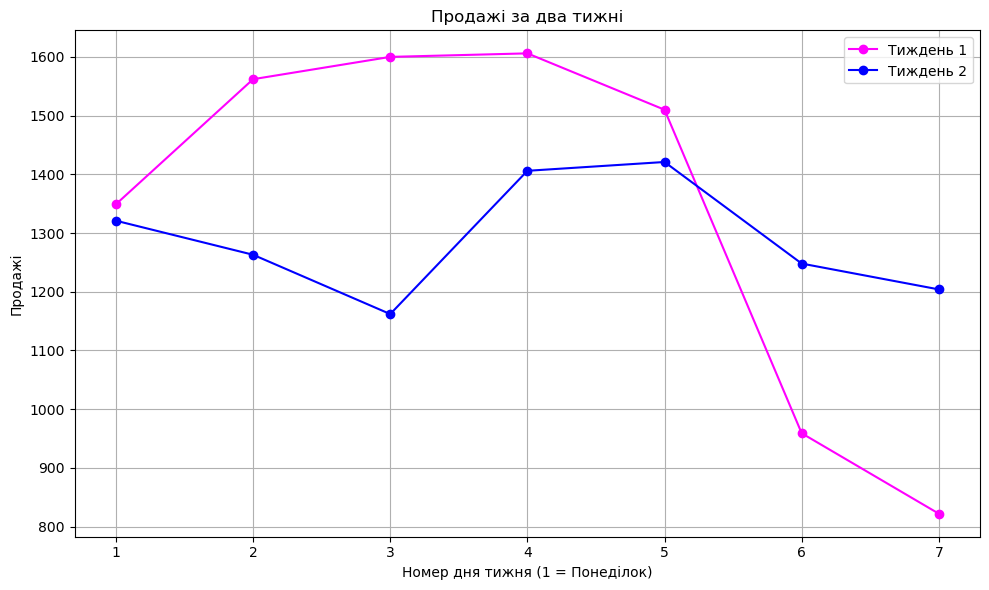

Станд.відхилення продажів Тиждень 1: 300.00
Станд.відхилення продажів Тиждень 2: 90.91


In [17]:
plt.figure(figsize=(10,6))
plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='magenta')
plt.plot(days, sales_week2, marker='o', label='Тиждень 2', color='blue')
plt.title('Продажі за два тижні')
plt.xlabel('Номер дня тижня (1 = Понеділок)')
plt.ylabel('Продажі')
plt.xticks(days)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Обчислення стабільності через стандартне відхилення
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)
print(f"Станд.відхилення продажів Тиждень 1: {std_week1:.2f}")
print(f"Станд.відхилення продажів Тиждень 2: {std_week2:.2f}")

## Відповіді
1. Більш стабільним виглядає Тиждень 2, бо дані менше розкидані та не мають різких піків та спадів.
2. Підкріпити цей висновок можна обрахувавши стандартне відхилення. Отримані значення Тиждень 1 - 300.00, Тиждень 2 - 90.91 підтверджують, що Тиждень 2 дійсно більш стабільний

## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

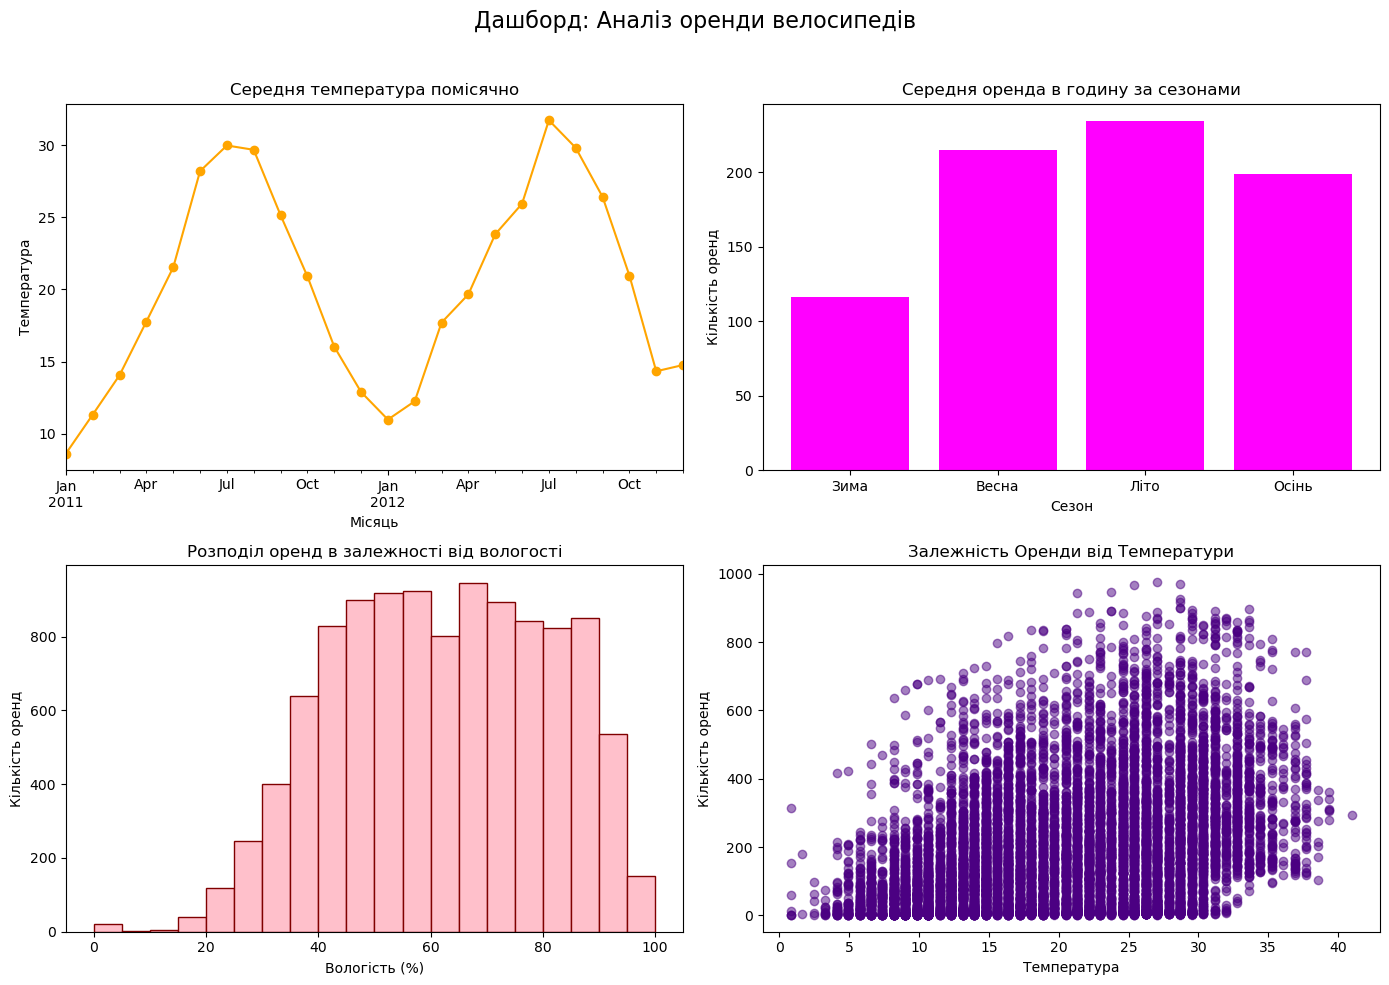

In [27]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)
monthly_temp = df.resample('ME')['temp'].mean()
season_avg = df.groupby('season')['count'].mean()
humidity_data = df['humidity']
scatter_x = df['temp']
scatter_y = df['count']
season_labels = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
season_avg.index = season_avg.index.map(season_labels)
plt.figure(figsize=(14,10))
plt.suptitle('Дашборд: Аналіз оренди велосипедів', fontsize=16)

# 1. Лінійний графік середньої температури помісячно
plt.subplot(2,2,1)
monthly_temp.plot(marker='o', color='orange')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура')

# 2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами
plt.subplot(2,2,2)
plt.bar(season_avg.index, season_avg.values, color='magenta')
plt.title('Середня оренда в годину за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')

# 3. Гістограма вологості за всіма погодинними вимірами
plt.subplot(2,2,3)
plt.hist(humidity_data, bins=20, color='pink', edgecolor='maroon')
plt.title('Розподіл оренд в залежності від вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість оренд')

# 4. Scatter plot температури vs кількості оренд
plt.subplot(2,2,4)
plt.scatter(scatter_x, scatter_y, alpha=0.5, color='indigo')
plt.title('Залежність Оренди від Температури')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

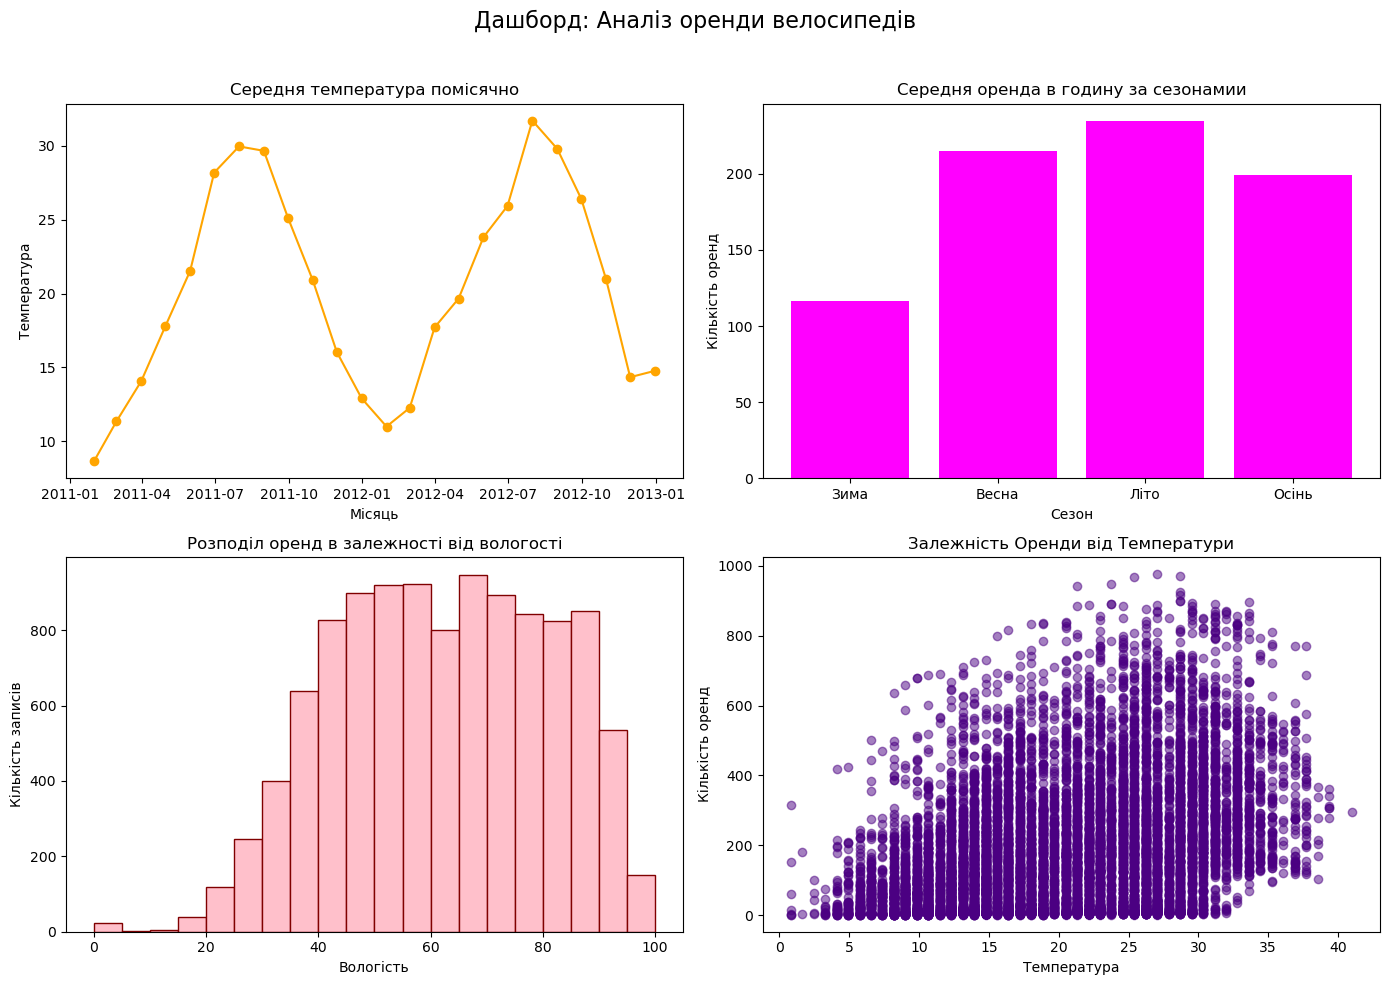

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Дашборд: Аналіз оренди велосипедів', fontsize=16)

# Графік 1
ax[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='orange')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура')

# Графік 2
ax[0, 1].bar(season_avg.index, season_avg.values, color='magenta')
ax[0, 1].set_title('Середня оренда в годину за сезонамии')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')

# Графік 3
ax[1, 0].hist(humidity_data, bins=20, color='pink', edgecolor='maroon')
ax[1, 0].set_title('Розподіл оренд в залежності від вологості')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Кількість записів')

# Графік 4
ax[1, 1].scatter(scatter_x, scatter_y, alpha=0.5, color='indigo')
ax[1, 1].set_title('Залежність Оренди від Температури')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Відповіді
Відмінності plt.subplots() від plt.subplot() 
З subplots завдяки ООП легше працювати з кожним графіком; можна звертатись до кожної осі напряму, легко змінювати стиль та порядорк, а також він легше читається. plt.subplot більше підходитимедля простих задач, а plt.subplots для більш складних.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

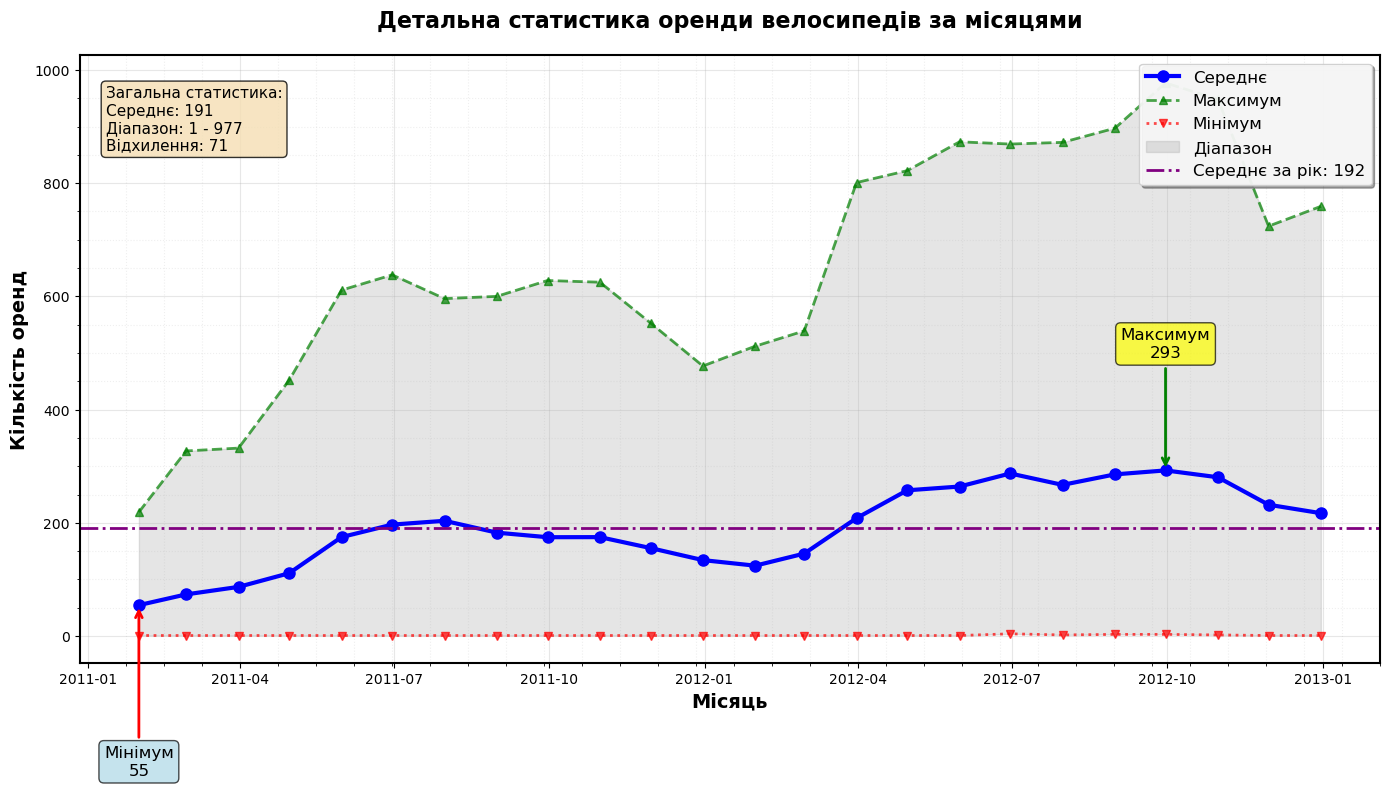

In [38]:
import matplotlib.dates as mdates
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']])
df.set_index('datetime', inplace=True)

# Обчислюємо статистику по місяцях
monthly_stats = df['count'].resample('ME').agg(['mean', 'min', 'max'])

# Створюємо графік
fig, ax = plt.subplots(figsize=(14, 8))

# Лінії
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', linewidth=3, label='Середнє', markersize=8)
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', linewidth=2, label='Максимум', markersize=6, alpha=0.7)
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', linewidth=2, label='Мінімум', markersize=6, alpha=0.7)

# Заливка між min та max
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], alpha=0.2, color='gray', label='Діапазон')

# Анотації
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()

ax.annotate(f'Максимум\n{max_val:.0f}',
            xy=(max_idx, max_val), xytext=(max_idx, max_val + 200),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

ax.annotate(f'Мінімум\n{min_val:.0f}',
            xy=(min_idx, min_val), xytext=(min_idx, min_val - 300),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

# Середня лінія за рік
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, color='purple', linestyle='-.', linewidth=2,
           label=f'Середнє за рік: {overall_mean:.0f}')

# Форматування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренди велосипедів за місяцями',
             fontsize=16, fontweight='bold', pad=20)

# Форматування осі X
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Сітка
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.2)
ax.minorticks_on()

# Легенда
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True,
          fancybox=True, framealpha=0.9)

# Текстовий блок
mean_val = monthly_stats['mean'].mean()
min_val = monthly_stats['min'].min()
max_val = monthly_stats['max'].max()
range_text = f"{int(min_val)} - {int(max_val)}"
std_dev = monthly_stats['mean'].std()

textstr = (
    "Загальна статистика:\n"
    f"Середнє: {int(mean_val)}\n"
    f"Діапазон: {range_text}\n"
    f"Відхилення: {int(std_dev)}"
)

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Товщина рамки
to_style = ['top', 'right', 'bottom', 'left']
for side in to_style:
    ax.spines[side].set_linewidth(1.5)

plt.tight_layout()
plt.show()

## Відповіді
1. Анотації допомагають звернути увагу та ключові моменти та полегшують читабельність графіка та його інтерпритацію.
2. fill_between() використовується для візуального підкрислення діапазону між двома показниками, наприклад мінімум та максимум, а це дозволяє легше побачити коливання даних
3. Текстовий блок допомагає виділити ключову статистику, що робить графік більш інформативним і зручним для швидкого аналізу та сприйняття